In [1]:
# In[ ]: Importação dos pacotes necessários
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
from math import exp, factorial
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
# In[ ]:
##############################################################################
#                 A DISTRIBUIÇÃO POISSON - PARTE CONCEITUAL                  #
##############################################################################

#Estabelecendo uma função da distribuição Poisson para determinados valores
#de lambda
def poisson_lambda(lmbda,m):
    return (exp(-lmbda) * lmbda ** m) / factorial(m)

In [3]:
# In[ ]: Plotagem das funções estabelecidas para diferentes valores de lambda

m = np.arange(0,21)

lmbda_1 = []
lmbda_2 = []
lmbda_4 = []

for item in m:
    # Estabelecendo a distribuição com lambda = 1
    lmbda_1.append(poisson_lambda(1,item))
    # Estabelecendo a distribuição com lambda = 2
    lmbda_2.append(poisson_lambda(2,item))
    # Estabelecendo a distribuição com lambda = 4
    lmbda_4.append(poisson_lambda(4,item))

#Criando um dataframe com m variando de 0 a 20 e diferentes valores de lambda
df_lambda = pd.DataFrame({'m':m,
                          'lambda_1':lmbda_1,
                          'lambda_2':lmbda_2,
                          'lambda_4':lmbda_4})
df_lambda

,m,lambda_1,lambda_2,lambda_4
0,0,3.678794e-01,1.353353e-01,0.018316
1,1,3.678794e-01,2.706706e-01,0.073263
2,2,1.839397e-01,2.706706e-01,0.146525
3,3,6.131324e-02,1.804470e-01,0.195367
4,4,1.532831e-02,9.022352e-02,0.195367
5,5,3.065662e-03,3.608941e-02,0.156293
6,6,5.109437e-04,1.202980e-02,0.104196
7,7,7.299195e-05,3.437087e-03,0.059540
8,8,9.123994e-06,8.592716e-04,0.029770
9,9,1.013777e-06,1.909493e-04,0.013231


<function matplotlib.pyplot.show(close=None, block=None)>

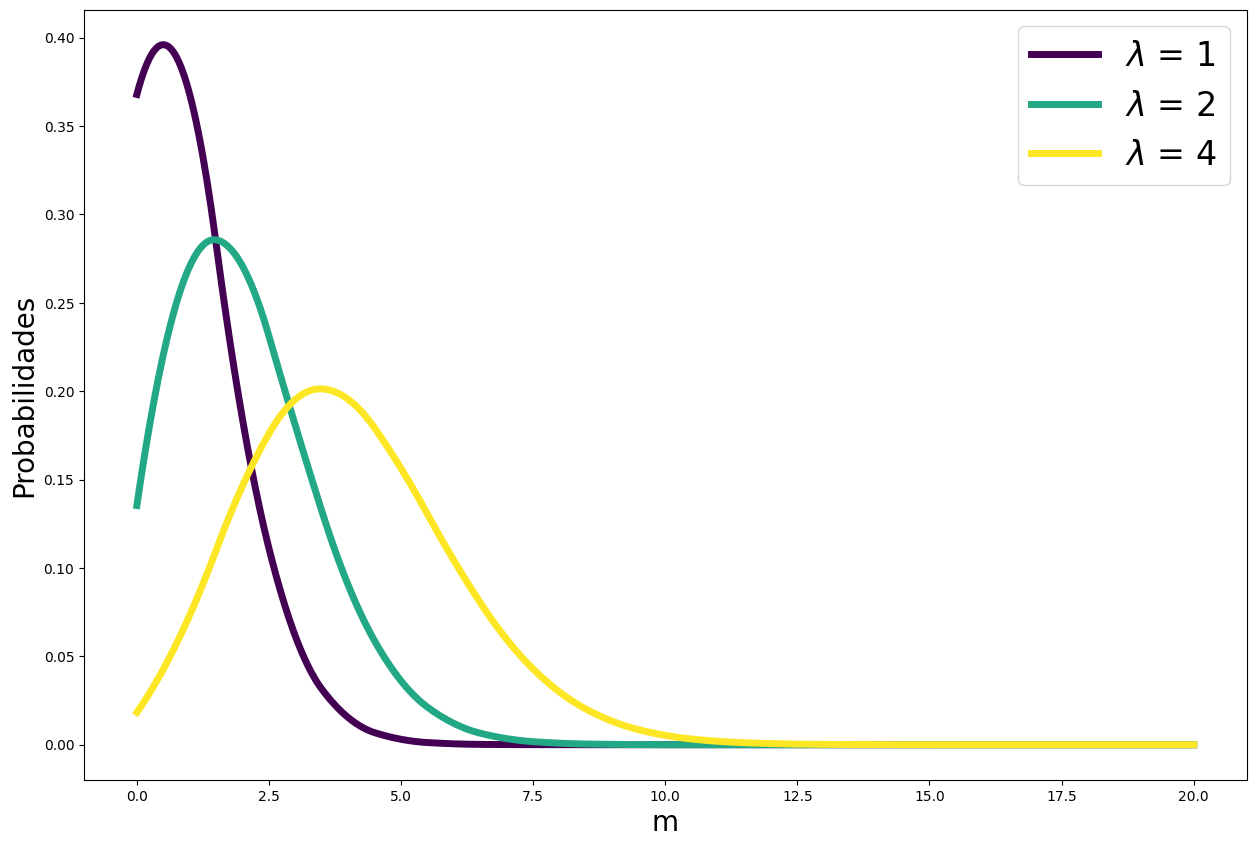

In [4]:
# In[ ]: Plotagem propriamente dita

from scipy.interpolate import interp1d

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, lambda_1 = smooth_line_plot(df_lambda.m, df_lambda.lambda_1)
x_new, lambda_2 = smooth_line_plot(df_lambda.m, df_lambda.lambda_2)
x_new, lambda_4 = smooth_line_plot(df_lambda.m, df_lambda.lambda_4)

plt.figure(figsize=(15,10))
plt.plot(x_new,lambda_1, linewidth=5, color='#440154FF')
plt.plot(x_new,lambda_2, linewidth=5, color='#22A884FF')
plt.plot(x_new,lambda_4, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20)
plt.ylabel('Probabilidades', fontsize=20)
plt.legend([r'$\lambda$ = 1',r'$\lambda$ = 2',r'$\lambda$ = 4'], fontsize=24)
plt.show


In [5]:
# In[6]:
##############################################################################
#                      REGRESSÃO PARA DADOS DE CONTAGEM                      #
#                  CARREGAMENTO DA BASE DE DADOS corruption                  #
##############################################################################

#Fisman, R.; Miguel, E. Corruption, Norms, and Legal Enforcement:
#Evidence from Diplomatic Parking Tickets.
#Journal of Political Economy, v. 15, n. 6, p. 1020-1048, 2007.
#https://www.journals.uchicago.edu/doi/abs/10.1086/527495
df_corruption = pd.read_csv('corruption.csv', delimiter=',')
df_corruption

,country,code,violations,staff,post,corruption
0,Angola,AGO,50,9,no,1.047506
1,Angola,AGO,1,9,yes,1.047506
2,Albania,ALB,17,3,no,0.921079
3,Albania,ALB,0,3,yes,0.921079
4,United Arab Emirates,ARE,0,3,no,-0.779468
...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807
294,Zambia,ZMB,37,9,no,0.562193
295,Zambia,ZMB,0,9,yes,0.562193
296,Zimbabwe,ZWE,43,14,no,0.133379


In [6]:
#Características das variáveis do dataset
df_corruption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     298 non-null    object 
 1   code        298 non-null    object 
 2   violations  298 non-null    int64  
 3   staff       298 non-null    int64  
 4   post        298 non-null    object 
 5   corruption  298 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.1+ KB


In [7]:
#Estatísticas univariadas
df_corruption.describe()

,violations,staff,corruption
count,298.000000,298.000000,298.000000
mean,6.496644,11.805369,0.013641
std,18.210377,11.079558,1.012474
min,0.000000,2.000000,-2.582988
25%,0.000000,6.000000,-0.415147
50%,0.000000,9.000000,0.326959
75%,3.000000,14.000000,0.720250
max,167.000000,86.000000,1.582807


In [8]:
# In[ ]: Tabela de frequências da variável dependente 'violations'
#Função 'values_counts' do pacote 'pandas' sem e com normalização
#para gerar as contagens e os percentuais, respectivamente
contagem = df_corruption['violations'].value_counts(dropna=False)
percent = df_corruption['violations'].value_counts(dropna=False, normalize=True)
pd.concat([contagem, percent], axis=1, keys=['contagem','%'], sort=True)

,contagem,%
violations,,
0,156,0.523490
1,35,0.117450
2,16,0.053691
3,17,0.057047
4,5,0.016779
5,10,0.033557
6,3,0.010067
7,4,0.013423
8,3,0.010067


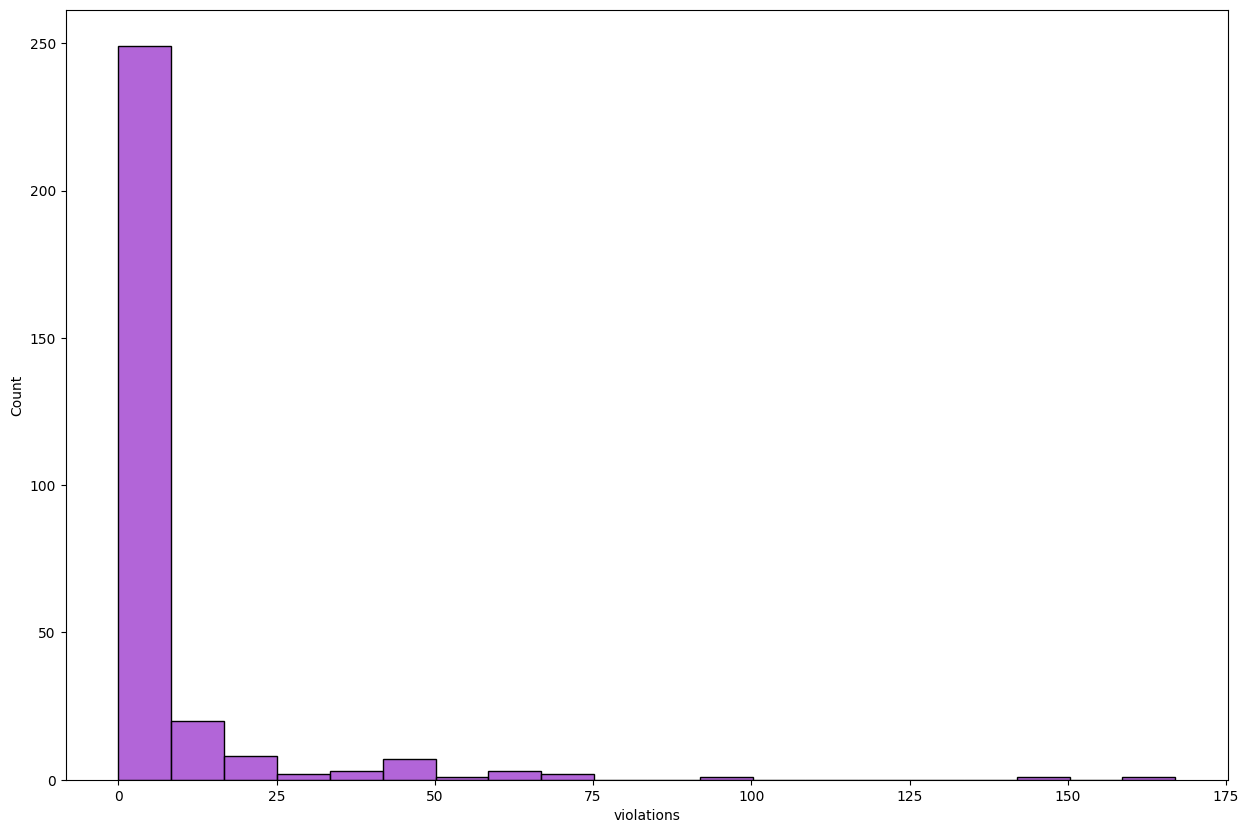

In [9]:
# In[ ]: Histograma da variável dependente 'violations'
plt.figure(figsize=(15,10))
sns.histplot(data=df_corruption, x="violations", bins=20, color='darkorchid')
plt.show()

In [10]:
# In[ ]: Diagnóstico preliminar para observação de eventual igualdade entre a
#média e a variância da variável dependente 'violations'
pd.DataFrame({'Média':[df_corruption.violations.mean()],
              'Variância':[df_corruption.violations.var()]})

,Média,Variância
0,6.496644,331.617834


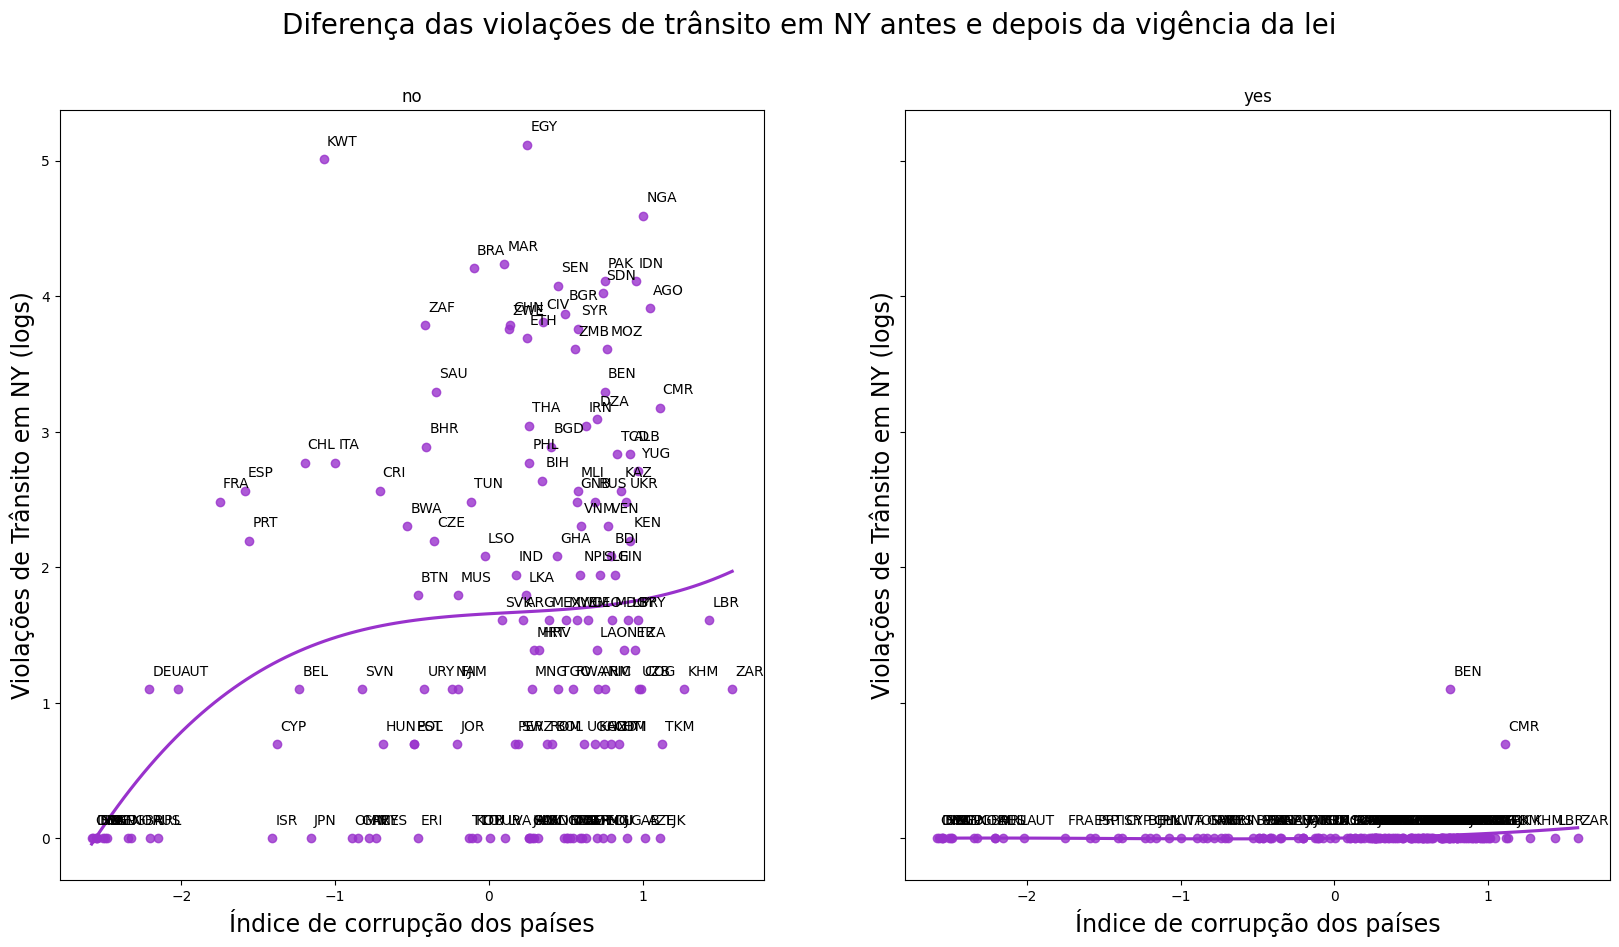

In [11]:
# In[ ]: Comportamento das variáveis 'corruption' e 'violations' antes e
#depois do início da vigência da lei
fig, axs = plt.subplots(ncols=2, figsize=(20,10), sharey=True)

fig.suptitle('Diferença das violações de trânsito em NY antes e depois da vigência da lei',
             fontsize = 20)

post = ['no','yes']

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.1, str(point['val']))

for i, v in enumerate(post):
    df = df_corruption[df_corruption.post==v]
    df['violations'] = np.log(df.violations)
    df.loc[df['violations']==np.inf, 'violations'] = 0
    df.loc[df['violations']==-np.inf, 'violations'] = 0
    sns.regplot(data=df, x='corruption', y='violations',order=3, ax=axs[i],
                ci=False, color='darkorchid')
    axs[i].set_title(v)
    axs[i].set_ylabel("Violações de Trânsito em NY (logs)", fontsize = 17)
    axs[i].set_xlabel("Índice de corrupção dos países", fontsize = 17)
    label_point(df.corruption, df.violations, df.code, axs[i])  

plt.show()

In [12]:
# In[ ]: Estimação do modelo Poisson

#O argumento 'family=sm.families.Poisson()' da função 'smf.glm' define a
#estimação de um modelo Poisson
modelo_poisson = smf.glm(formula='violations ~ staff + post + corruption',
                         data=df_corruption,
                         family=sm.families.Poisson()).fit()

In [13]:
#Parâmetros do modelo
modelo_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Fri, 12 Jul 2024   Deviance:                       3644.0
Time:                        20:59:52   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      0.000       2.152       2.274
post[T.yes]    -4.2968      0.197    -21.762      0.000      -4.684      -3.910
staff           0.0219      0.001     17.807      0.000       0.019       0.024
corruption      0.3418      0.027     12.430      0.000       0.288       0.396
===============================================================================
"""

In [14]:
# In[ ]: Outro modo mais completo de apresentar os outputs do modelo,
#pela função 'summary_col'
summary_col([modelo_poisson],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,2.2127***
,(0.0311)
post[T.yes],-4.2968***
,(0.1974)
staff,0.0219***
,(0.0012)
corruption,0.3418***
,(0.0275)
N,298
Log-lik,-2071.79


In [15]:
################################################################################
#            TESTE DE SUPERDISPERSÃO DE CAMERON E TRIVEDI (1990)               #
################################################################################
#CAMERON, A. C.; TRIVEDI, P. K. Regression-based tests for overdispersion in
#the Poisson model. Journal of Econometrics, v. 46, n. 3, p. 347-364, 1990.

#1º Passo: estimar um modelo Poisson;
#2º Passo: criar uma nova variável (Y*) utilizando os fitted values do modelo
#Poisson estimado anteriormente;
#3º Passo: estimar um modelo auxiliar OLS, com a variável Y* como variável
#dependente, os fitted values do modelo Poisson como única variável preditora e 
#sem o intercepto;
#4º Passo: Observar a significância do parâmetro beta.

#Adicionando os fitted values do modelo Poisson (lambda_poisson) ao dataframe:
df_corruption['lambda_poisson'] = modelo_poisson.fittedvalues
df_corruption

,country,code,violations,staff,post,corruption,lambda_poisson
0,Angola,AGO,50,9,no,1.047506,15.919915
1,Angola,AGO,1,9,yes,1.047506,0.216711
2,Albania,ALB,17,3,no,0.921079,13.371720
3,Albania,ALB,0,3,yes,0.921079,0.182023
4,United Arab Emirates,ARE,0,3,no,-0.779468,7.477915
...,...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807,0.243691
294,Zambia,ZMB,37,9,no,0.562193,13.486751
295,Zambia,ZMB,0,9,yes,0.562193,0.183589
296,Zimbabwe,ZWE,43,14,no,0.133379,12.994217


In [16]:
#Criando a nova variável Y*:
df_corruption['ystar'] = (((df_corruption['violations']
                            -df_corruption['lambda_poisson'])**2)
                        -df_corruption['violations'])/df_corruption['lambda_poisson']
df_corruption

,country,code,violations,staff,post,corruption,lambda_poisson,ystar
0,Angola,AGO,50,9,no,1.047506,15.919915,69.815208
1,Angola,AGO,1,9,yes,1.047506,0.216711,-1.783289
2,Albania,ALB,17,3,no,0.921079,13.371720,-0.286843
3,Albania,ALB,0,3,yes,0.921079,0.182023,0.182023
4,United Arab Emirates,ARE,0,3,no,-0.779468,7.477915,7.477915
...,...,...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807,0.243691,0.243691
294,Zambia,ZMB,37,9,no,0.562193,13.486751,38.250347
295,Zambia,ZMB,0,9,yes,0.562193,0.183589,0.183589
296,Zimbabwe,ZWE,43,14,no,0.133379,12.994217,65.979120


In [18]:
#Estimando o modelo auxiliar OLS, sem o intercepto:
modelo_auxiliar = smf.ols(formula='ystar ~ 0 + lambda_poisson',
                          data=df_corruption).fit()

In [19]:
#Parâmetros do 'modelo_auxiliar'
modelo_auxiliar.summary()
#Caso o p-value do parâmetro do lambda_poisson seja maior que 0.05,
#verifica-se a existência de equidispersão nos dados.
#Caso contrário, diagnostica-se a existência de superdispersão nos dados, fato
#que favorecerá a estimação de um modelo binomial negativo, como ocorre nesse
#caso.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ystar   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              7.584
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                     0.00625
Time:                        21:16:43   Log-Likelihood:                         -1952.9
No. Observations:                 298   AIC:                                      3908.
Df Residuals:                     297   BIC:                                      3911.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
lambda_poisson     2.6525      0.963      2.754      0.006       0.757       4.548
==============================================================================
Omnibus:                      607.263   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           446004.649
Skew:                          13.265   Prob(JB):                         0.00
Kurtosis:                     190.659   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# In[ ]: Função 'overdisp'
# Instalação e carregamento da função 'overdisp' do pacote 'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/
# pip install statstests
from statstests.tests import overdisp

In [25]:
#Elaboração direta do teste de superdispersão
overdisp(modelo_poisson, df_corruption)

Estimating model...: 
 GLM
                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.022    
Dependent Variable:     ystar            AIC:                         3907.7809
Date:                   2024-07-12 21:21 BIC:                         3911.4780
No. Observations:       298              Log-Likelihood:              -1952.9  
Df Model:               1                F-statistic:                 7.584    
Df Residuals:           297              Prob (F-statistic):          0.00625  
R-squared (uncentered): 0.025            Scale:                       28915.   
-------------------------------------------------------------------------------------
            Coef.        Std.Err.         t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
lmbda       2.6525         0.9632       2.7538       0.0063       0.7569       4.5480
-------------

In [26]:
# In[ ]: Apenas para fins didáticos, caso considerássemos a estimação Poisson
#como a mais adequada, qual seria a quantidade média esperada de violações
#de trânsito para um país cujo corpo diplomático fosse composto por 23 membros,
#considerando o período anterior à vigência da lei e cujo índice de corrupção
#seja igual a 0.5?
modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))

0    17.93284
dtype: float64

In [27]:
#Qual seria a quantidade média esperada de violações de trânsito para o mesmo
#país, porém agora considerando a vigência da lei?

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['yes'],
                                     'corruption':[0.5]}))

0    0.244112
dtype: float64

In [32]:
#Qual seria a quantidade média esperada de violações de trânsito para o mesmo
#país, porém agora considerando a vigência da lei?

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['yes'],
                                     'corruption':[0.5]}))

0    0.244112
dtype: float64

In [31]:
#Exemplo do cálculo
exp(2.2127 + 0.0219 * 23 - 42968 * 0 + 0.3418 * 0.5)

17.9447931922524

In [ ]:
# In[ ]:
##############################################################################
#            A DISTRIBUIÇÃO BINOMIAL NEGATIVA - PARTE CONCEITUAL             #
##############################################################################

#Estabelecendo uma função da distribuição binomial negativa para determinados
#valores de theta e delta
#theta: parâmetro de forma da distribuição Poisson-Gama (binomial negativa)
#delta: parâmetro de taxa de decaimento da distribuição Poisson-Gama

In [ ]:
2:54:14